# In this project NLP model will b developed to perform sentiment analysis of Apple Inc. on twitter

### Dataset for this project is taken from Analytics Vidhya challenege

In [1]:
import pandas as pd

In [2]:
data=pd.read_csv(r'D:\pandasdataset\project\nlp\SENTIMENT ANALYSIS\train_apple_twitter.csv',dtype=str)

In [3]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


### tweet column consist of tweets where label column describe sentiment of the tweet. 0 shows positive sentiment while 1 shows negative sentiment

### dropping unwanted column

In [4]:
data=data.drop('id',axis=1)

### changing all tweets to lowercase

In [5]:
data['tweet']=data['tweet'].str.lower()

### many twets have website links. cleaning all those from the text

In [6]:
data['tweet']=data['tweet'].str.replace('http\S+|www.\S+', '', case=False)

In [7]:
data['tweet']

0       #fingerprint #pregnancy test  #android #apps #...
1       finally a transparant silicon case ^^ thanks t...
2       we love this! would you go? #talk #makememorie...
3       i'm wired i know i'm george i was made that wa...
4       what amazing service! apple won't even talk to...
                              ...                        
7915    live out loud #lol #liveoutloud #selfie #smile...
7916    we would like to wish you an amazing day! make...
7917    helping my lovely 90 year old neighbor with he...
7918    finally got my #smart #pocket #wifi stay conne...
7919    apple barcelona!!! #apple #store #bcn #barcelo...
Name: tweet, Length: 7920, dtype: object

### removing unwanted twitter hashtags

In [8]:
import re
def hashtag(word):
    word=re.sub("#[A-Za-z0-9]+","",word)
    return word

In [9]:
data['x']=data['tweet'].apply(hashtag)
data['x']

0                                          test          
1       finally a transparant silicon case ^^ thanks t...
2                 we love this! would you go?        ... 
3       i'm wired i know i'm george i was made that wa...
4       what amazing service! apple won't even talk to...
                              ...                        
7915                                live out loud        
7916    we would like to wish you an amazing day! make...
7917    helping my lovely 90 year old neighbor with he...
7918    finally got my    stay connected anytime,anywh...
7919                       apple barcelona!!!          … 
Name: x, Length: 7920, dtype: object

### generally tweets consist of word contractions. preprocessing all those contractions

In [10]:
def decontracted(phrase):
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [11]:
data['x1']=data['x'].apply(decontracted)
data['x1']

0                                          test          
1       finally a transparant silicon case ^^ thanks t...
2                 we love this! would you go?        ... 
3       i am wired i know i am george i was made that ...
4       what amazing service! apple wo not even talk t...
                              ...                        
7915                                live out loud        
7916    we would like to wish you an amazing day! make...
7917    helping my lovely 90 year old neighbor with he...
7918    finally got my    stay connected anytime,anywh...
7919                       apple barcelona!!!          … 
Name: x1, Length: 7920, dtype: object

### removing punctuations

In [12]:
import string
def clean_text(text):
    for punctuation in string.punctuation:
        text=text.replace(punctuation,'')
    return text

In [13]:
data['x2']=data['x1'].apply(clean_text)
data['x2']

0                                          test          
1       finally a transparant silicon case  thanks to ...
2                      we love this would you go         
3       i am wired i know i am george i was made that ...
4       what amazing service apple wo not even talk to...
                              ...                        
7915                                live out loud        
7916    we would like to wish you an amazing day make ...
7917    helping my lovely 90 year old neighbor with he...
7918    finally got my    stay connected anytimeanywhe...
7919                          apple barcelona          … 
Name: x2, Length: 7920, dtype: object

### removing stopwords

In [14]:
import nltk
from nltk.corpus import stopwords
eng_stop=set(stopwords.words('english'))

In [15]:
data['x3']=data['x2'].apply(lambda x: " ".join([word for word in x.split() if word not in (eng_stop)]))
data['x3']

0                                                    test
1         finally transparant silicon case thanks uncle …
2                                           love would go
3                              wired know george made way
4       amazing service apple wo even talk question un...
                              ...                        
7915                                            live loud
7916    would like wish amazing day make every minute ...
7917    helping lovely 90 year old neighbor ipad morni...
7918           finally got stay connected anytimeanywhere
7919                                    apple barcelona …
Name: x3, Length: 7920, dtype: object

### performing lemmitization

In [16]:
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

In [17]:
data['x4']=data['x3'].apply(lemmatizer.lemmatize)
data['x4']

0                                                    test
1         finally transparant silicon case thanks uncle …
2                                           love would go
3                              wired know george made way
4       amazing service apple wo even talk question un...
                              ...                        
7915                                            live loud
7916    would like wish amazing day make every minute ...
7917    helping lovely 90 year old neighbor ipad morni...
7918           finally got stay connected anytimeanywhere
7919                                    apple barcelona …
Name: x4, Length: 7920, dtype: object

### reading label data into separate column

In [18]:
y=data['label'].astype(int)

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer, TfidfTransformer
count_vect=CountVectorizer()
tfidf_transform=TfidfTransformer()
x_count=count_vect.fit_transform(data['x4'])
x_tfidf=tfidf_transform.fit_transform(x_count)

In [20]:
x_tfidf.shape

(7920, 10941)

### visualize word frequency

C:\Users\WIN 7\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


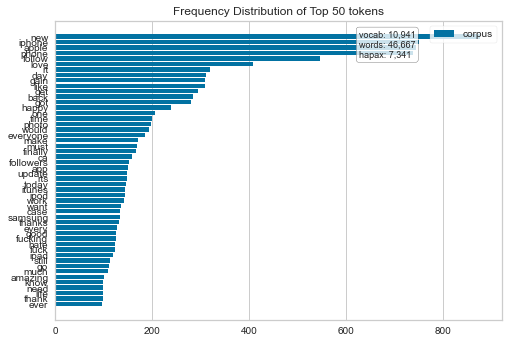

In [21]:
from yellowbrick.text import FreqDistVisualizer
features=count_vect.get_feature_names()
visualizer=FreqDistVisualizer(features=features)
visualizer.fit(x_count)
visualizer.show()

### visualizing word clusters from labels

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


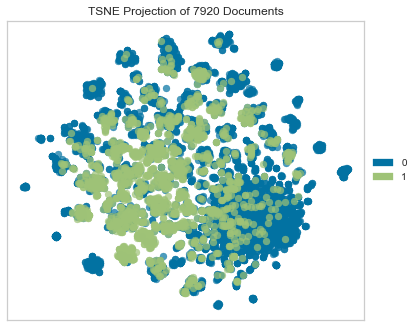

In [22]:
from yellowbrick.text import TSNEVisualizer
tsen=TSNEVisualizer()
tsen.fit(x_tfidf,y)
tsen.show()

### words clusters can clearly be seen for positive and negative sentiments. Again, few words are commonly appearing in both the clusters.

### prforming SMOTE to remove imbalance of target feature

In [23]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
X_SMOTE,Y_SMOTE=smote.fit_sample(x_tfidf,y)

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_SMOTE,Y_SMOTE,test_size=0.3)

In [25]:
from sklearn.naive_bayes import BernoulliNB
model=BernoulliNB(alpha=0.7)
model.fit(x_train,y_train)
y_predict=model.predict(x_test)
from sklearn.metrics import classification_report,accuracy_score
print(accuracy_score(y_test,y_predict))
print(classification_report(y_test,y_predict))
pd.crosstab(y_test,y_predict)

0.9344076901328809
              precision    recall  f1-score   support

           0       0.95      0.92      0.94      1809
           1       0.92      0.95      0.93      1728

    accuracy                           0.93      3537
   macro avg       0.93      0.93      0.93      3537
weighted avg       0.93      0.93      0.93      3537



col_0,0,1
label,,
0,1672,137
1,95,1633


C:\Users\WIN 7\anaconda3\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


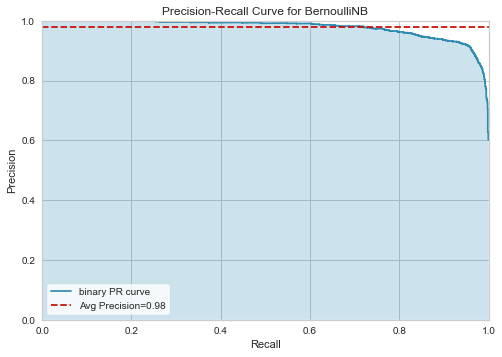

In [26]:
from yellowbrick.classifier import PrecisionRecallCurve
viz=PrecisionRecallCurve(model)
viz.fit(x_train,y_train)
viz.score(x_test,y_test)
viz.show()

### lets try our model for new tweet

In [27]:
new_text=pd.Series("i just love this iphone. great experience")

In [28]:
new_text

0    i just love this iphone. great experience
dtype: object

In [29]:
new_text=new_text.str.lower()
new_text=new_text.str.replace('http\S+|www.\S+', '', case=False)
x1=new_text.apply(decontracted)
x2=x1.apply(clean_text)
x3=x2.apply(lambda x: " ".join([word for word in x.split() if word not in (eng_stop)]))
x4=x3.apply(lemmatizer.lemmatize)
x_test = pd.DataFrame(tfidf_transform.fit_transform(count_vect.transform(x4)).todense(),columns=count_vect.get_feature_names())

In [30]:
y_test=model.predict(x_test)

In [31]:
print(y_test)

[0]


### model succesfully predicted the sentiment of new tweet